# Descriptive Analysis of Jail Population and Exogenous Variables

The goal of this noteboook is to visualize the past trends of the jail population data. This will inform of major trends in the jail population data for later time series analysis and which exogenous variables are more or less correlated to our DV.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
#import data
monthly_pop = pd.read_csv("../Data/_30_day_adp.csv", index_col = 0)
monthly_pop['Start Date'] = pd.to_datetime(monthly_pop['Start Date'])
monthly_pop['End Date'] = pd.to_datetime(monthly_pop['End Date'])


In [105]:
monthly_pop.head()

,Start Date,End Date,ADP
0,2016-05-15,2016-06-13,9820.0
1,2016-06-14,2016-07-13,9796.0
2,2016-07-14,2016-08-12,9730.0
3,2016-08-13,2016-09-11,9824.0
4,2016-09-12,2016-10-11,9845.0


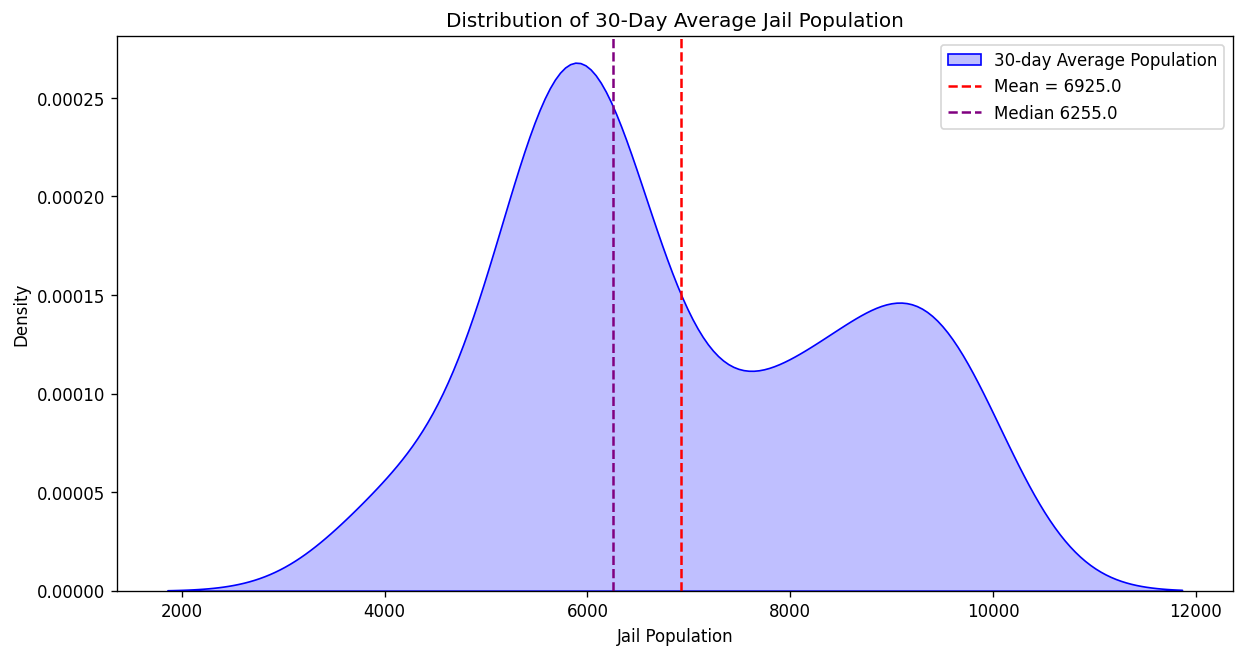

In [106]:
#plot kde for entire dataset to see distribution 
# Plotting the KDE plot with overlay
plt.figure(figsize=(12, 6))
sns.kdeplot(monthly_pop['ADP'], fill=True, color = 'b', label = '30-day Average Population')

# Overlay the mean/median
plt.axvline(monthly_pop['ADP'].mean(), color='red', linestyle='--', label=f"Mean = {monthly_pop['ADP'].mean().round()}")
plt.axvline(monthly_pop['ADP'].median(), color='purple', linestyle='--', label=f"Median {monthly_pop['ADP'].median().round()}")

plt.title('Distribution of 30-Day Average Jail Population')
plt.xlabel('Jail Population')
plt.ylabel('Density')
plt.legend()
plt.savefig("../Outputs/adp_kde_plot.png", bbox_inches = 'tight')
plt.show()


Based on the density plot above, 30-day ADP is bimodally distributed. This means there are two modes, major and minor, that indicates the existence of a subgroup with somewhat different characteristics compared with the major group. I am going to attempt to seperate these two distributions based on the date of the jail population sample.

### Split dates for pre/post COVID-19

According to [sources](https://www.governor.ny.gov/news/governor-cuomo-announces-new-york-ending-covid-19-state-disaster-emergency-june-24), New York Governor Andrew M. Cuomo ended the state disaster emergency declared on March 7, 2020 to fight COVID-19 June 25, 2021 given New York's dramatic progress against COVID-19, with the success in vaccination rates, and declining hospitalization.

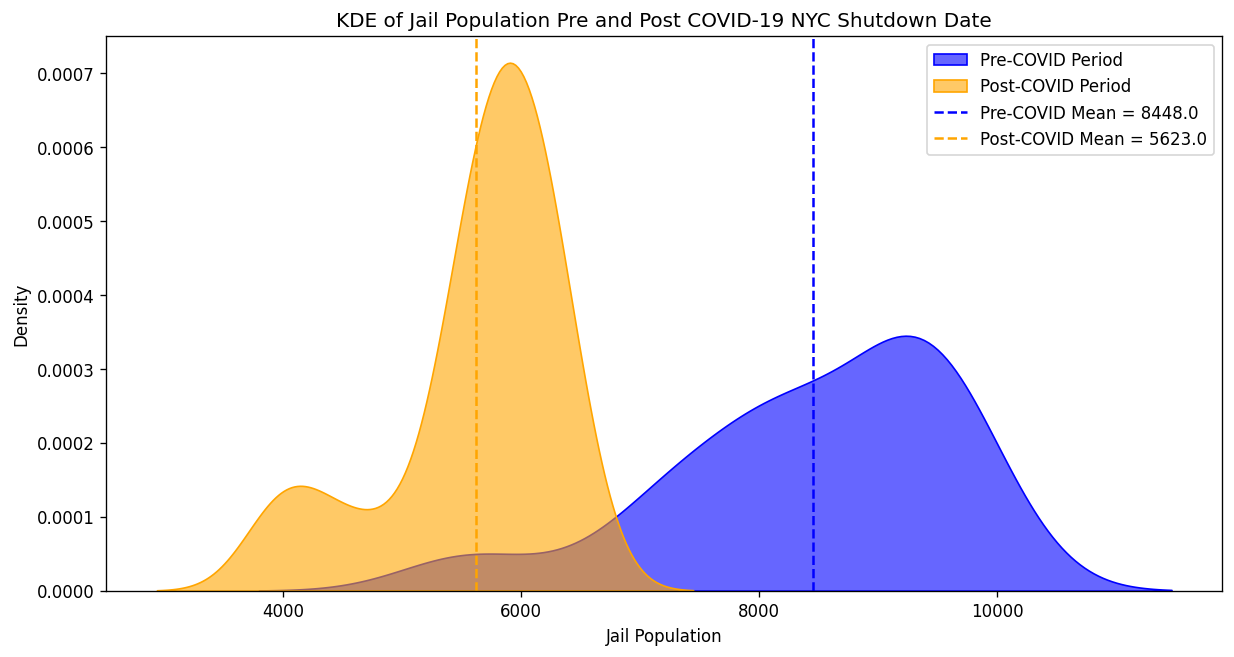

In [107]:
# Define a cutoff date (e.g., start of the COVID-19 pandemic)
cutoff_date = pd.to_datetime("2020-03-07")

# Split data into two periods
pre_cutoff = monthly_pop[monthly_pop['Start Date'] < cutoff_date]
post_cutoff = monthly_pop[monthly_pop['Start Date'] >= cutoff_date]

# Plot KDE for each period
plt.figure(figsize=(12, 6))

sns.kdeplot(pre_cutoff['ADP'], fill=True, color='blue', label='Pre-COVID Period', alpha=0.6)
sns.kdeplot(post_cutoff['ADP'], fill=True, color='orange', label='Post-COVID Period', alpha=0.6)

plt.axvline(pre_cutoff['ADP'].mean(), color='blue', linestyle='--', label=f"Pre-COVID Mean = {pre_cutoff['ADP'].mean().round()}")
plt.axvline(post_cutoff['ADP'].mean(), color='orange', linestyle='--', label=f"Post-COVID Mean = {post_cutoff['ADP'].mean().round()}")

plt.title('KDE of Jail Population Pre and Post COVID-19 NYC Shutdown Date')
plt.xlabel('Jail Population')
plt.ylabel('Density')
plt.legend()
plt.show()


We know that bail reform implementation was also a critical policy intervention for NYC. Let's replicate the above graphic but with the date in which judges began implementing bail reform.

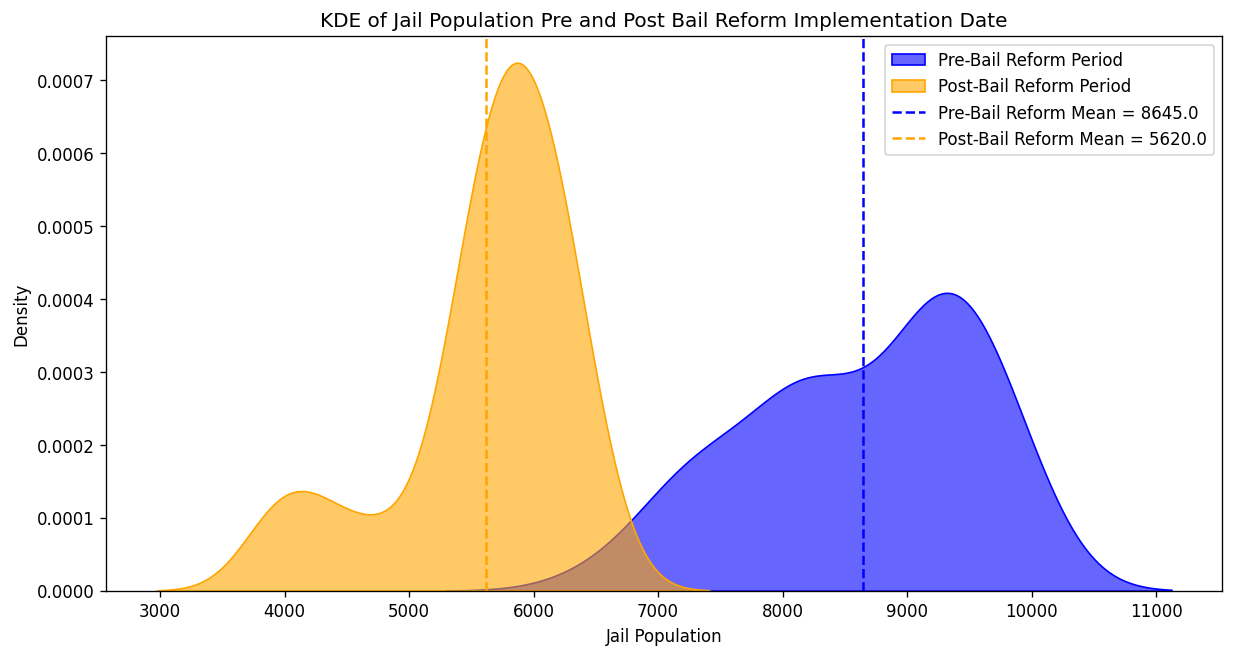

In [108]:
# Define a cutoff date (e.g., start of the COVID-19 pandemic)
cutoff_date = pd.to_datetime("2019-12-01")

# Split data into two periods
pre_cutoff = monthly_pop[monthly_pop['Start Date'] < cutoff_date]
post_cutoff = monthly_pop[monthly_pop['Start Date'] >= cutoff_date]

# Plot KDE for each period
plt.figure(figsize=(12, 6))

sns.kdeplot(pre_cutoff['ADP'], fill=True, color='blue', label='Pre-Bail Reform Period', alpha=0.6)
sns.kdeplot(post_cutoff['ADP'], fill=True, color='orange', label='Post-Bail Reform Period', alpha=0.6)

plt.axvline(pre_cutoff['ADP'].mean(), color='blue', linestyle='--', label=f"Pre-Bail Reform Mean = {pre_cutoff['ADP'].mean().round()}")
plt.axvline(post_cutoff['ADP'].mean(), color='orange', linestyle='--', label=f"Post-Bail Reform Mean = {post_cutoff['ADP'].mean().round()}")

plt.title('KDE of Jail Population Pre and Post Bail Reform Implementation Date')
plt.xlabel('Jail Population')
plt.ylabel('Density')
plt.legend()
plt.show()


### Scatter Plot with KDE Coloring by Date

We can also use a scatter plot where the x-axis is the 30-day average population (ADP), and the y-axis is the Start Date. You can then color the points based on their date to see how the population varies over time.

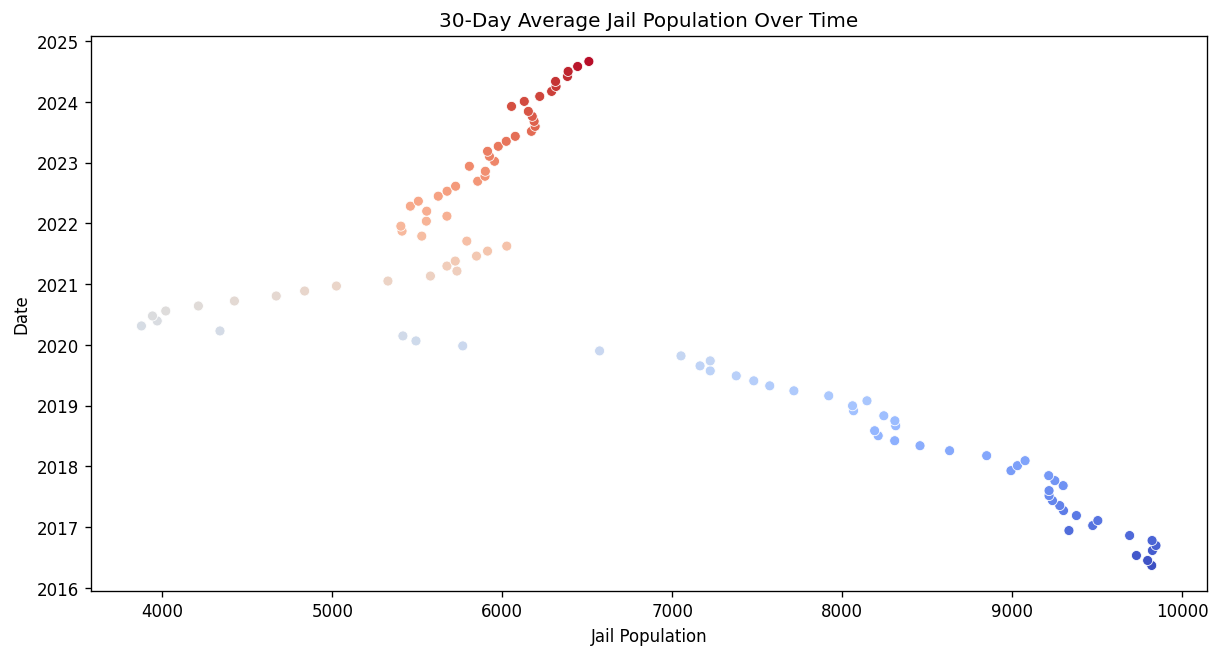

In [109]:
# Plot scatter plot of ADP over time with color gradient by Start Date
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='ADP', 
    y='Start Date', 
    hue='Start Date', 
    data=monthly_pop, 
    palette='coolwarm',
    legend=False
)

plt.title('30-Day Average Jail Population Over Time')
plt.xlabel('Jail Population')
plt.ylabel('Date')
plt.show()

### Time-Based KDE with a FacetGrid

To split the data across multiple time intervals (e.g., yearly, quarterly), we can use Seaborn’s FacetGrid to visualize multiple KDEs for different time periods.

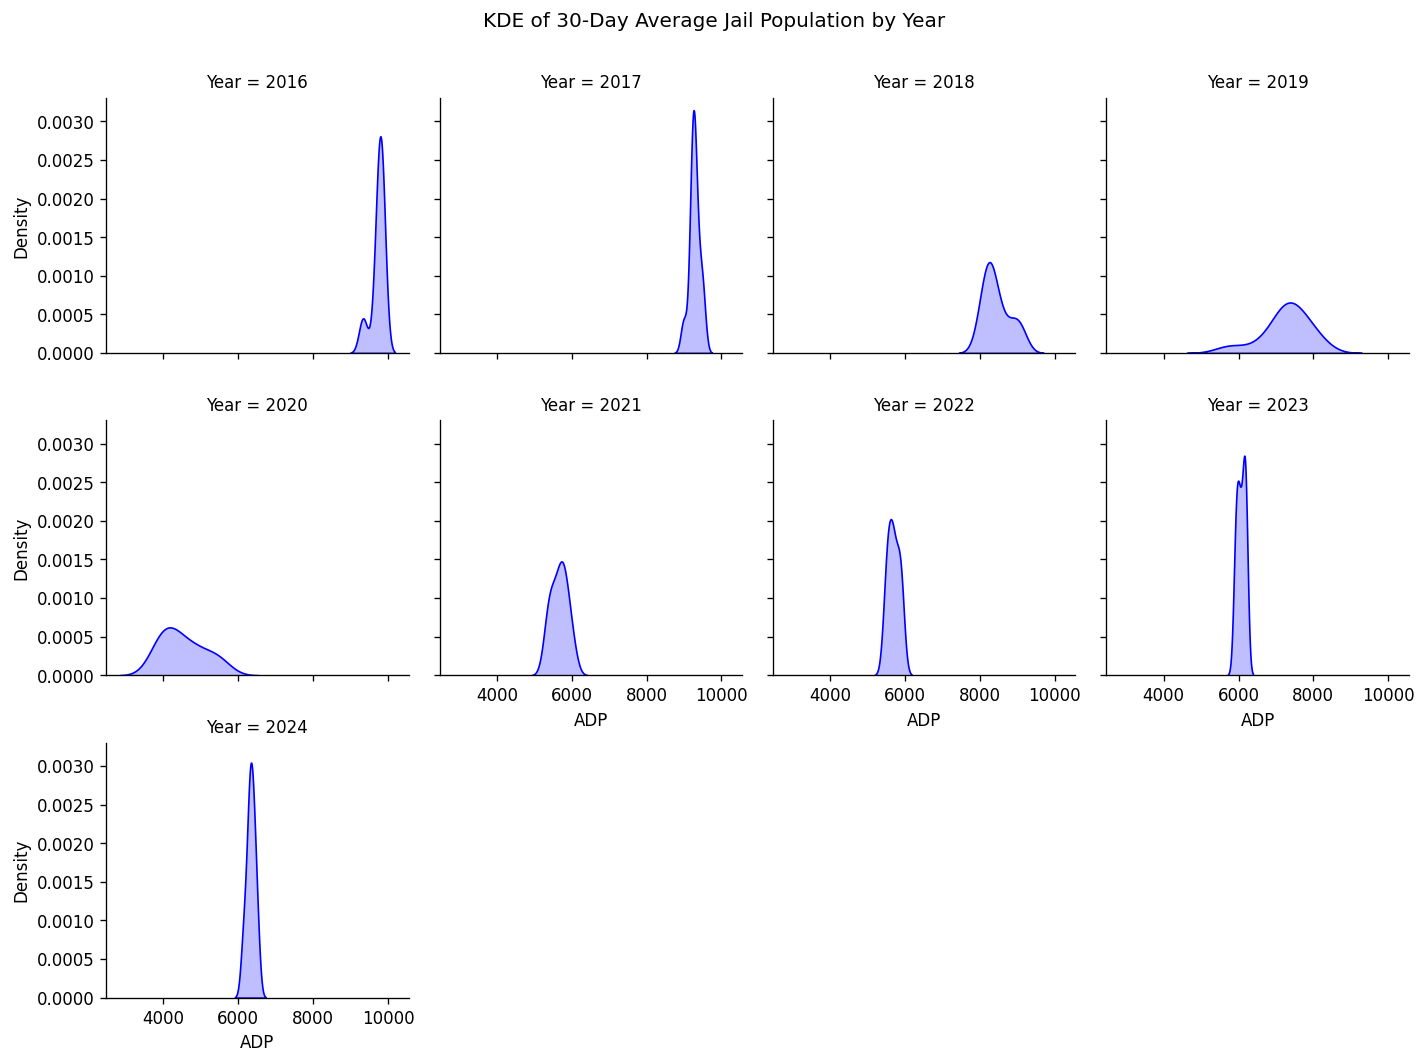

In [110]:
# Create a new column for the year
monthly_pop['Year'] = monthly_pop['Start Date'].dt.year

# Create a FacetGrid with yearly KDE plots
g = sns.FacetGrid(monthly_pop, col='Year', col_wrap=4, height=3)
g.map(sns.kdeplot, 'ADP', fill=True, color='blue')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('KDE of 30-Day Average Jail Population by Year')
plt.show()

### Cluster Analysis on the Population Data

Another approach would be to apply clustering techniques like k-means clustering to the population data to identify natural subgroups based on the values. You can include the time information in the clustering process.

In [111]:
from sklearn.cluster import KMeans

c:\Users\emjoh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


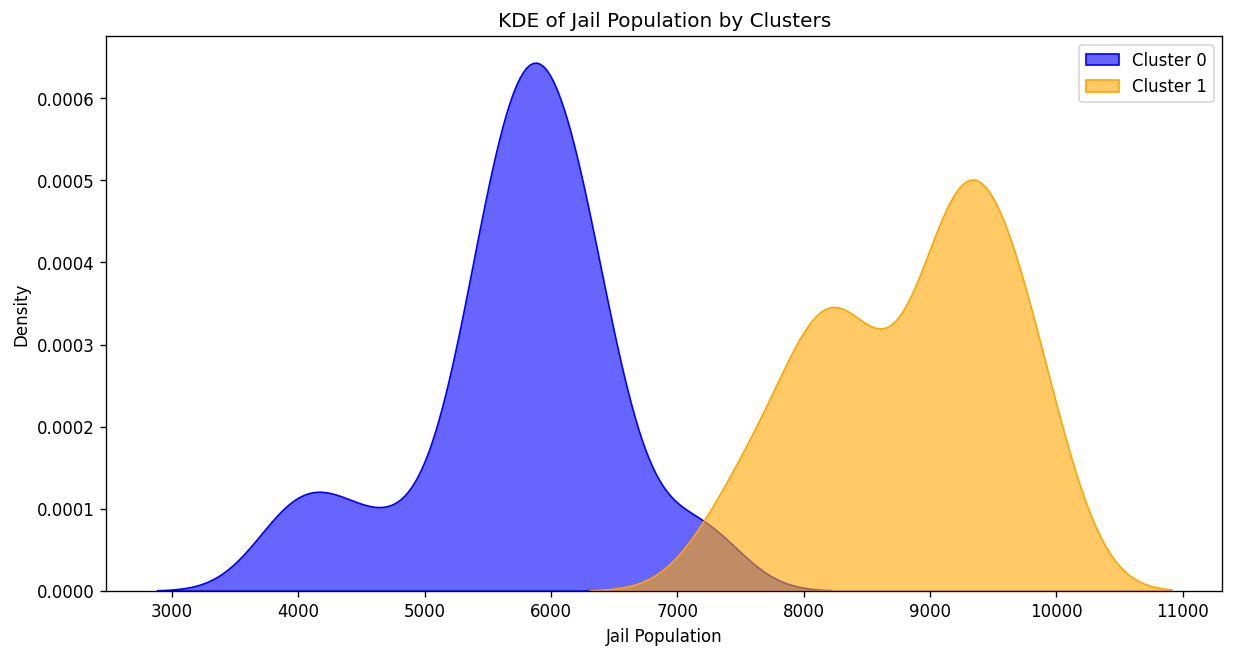

In [112]:
# Fit a k-means clustering algorithm on the ADP values (assuming 2 clusters for the bimodal distribution)
kmeans = KMeans(n_clusters=2, random_state=0)
monthly_pop['Cluster'] = kmeans.fit_predict(monthly_pop[['ADP']])

# Plot KDE with cluster information
plt.figure(figsize=(12, 6))

sns.kdeplot(monthly_pop[monthly_pop['Cluster'] == 0]['ADP'], fill=True, color='blue', label='Cluster 0', alpha=0.6)
sns.kdeplot(monthly_pop[monthly_pop['Cluster'] == 1]['ADP'], fill=True, color='orange', label='Cluster 1', alpha=0.6)

plt.title('KDE of Jail Population by Clusters')
plt.xlabel('Jail Population')
plt.ylabel('Density')
plt.legend()
plt.show()


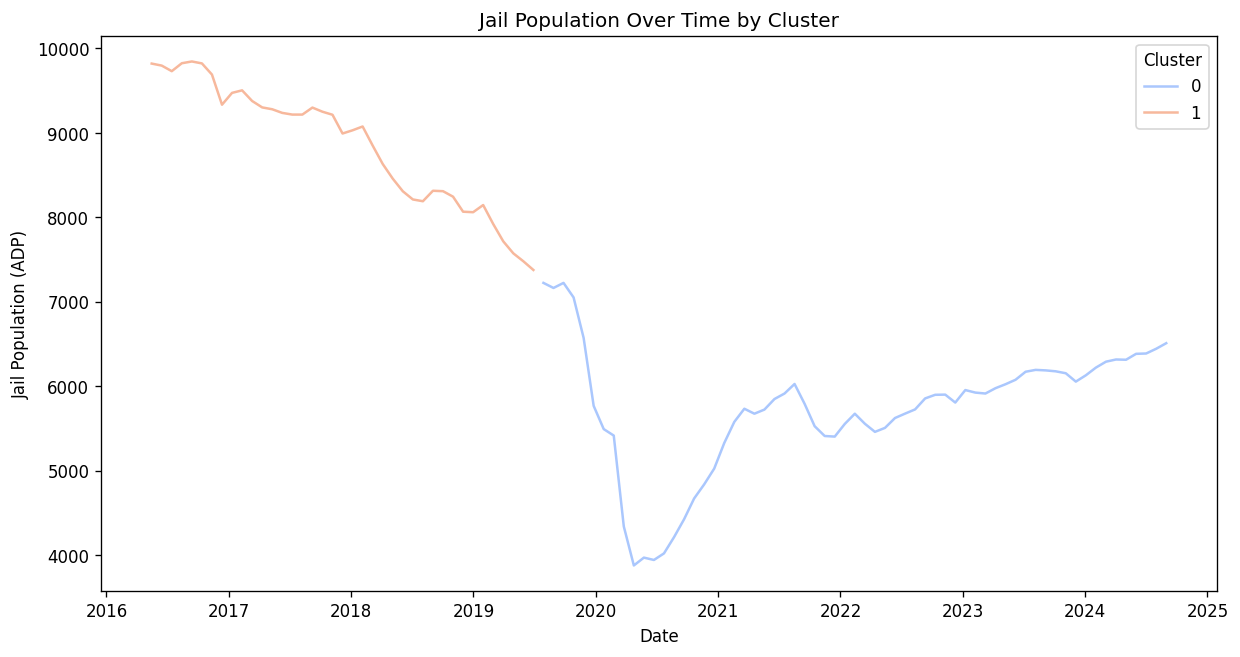

In [113]:
# Plot the distribution of clusters over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Start Date', y='ADP', hue='Cluster', data=monthly_pop, palette='coolwarm')

plt.title('Jail Population Over Time by Cluster')
plt.xlabel('Date')
plt.ylabel('Jail Population (ADP)')
plt.legend(title='Cluster')
plt.show()

The clustering technique was able to help us identify the cut off date between the two distributions within the sample of ADP.

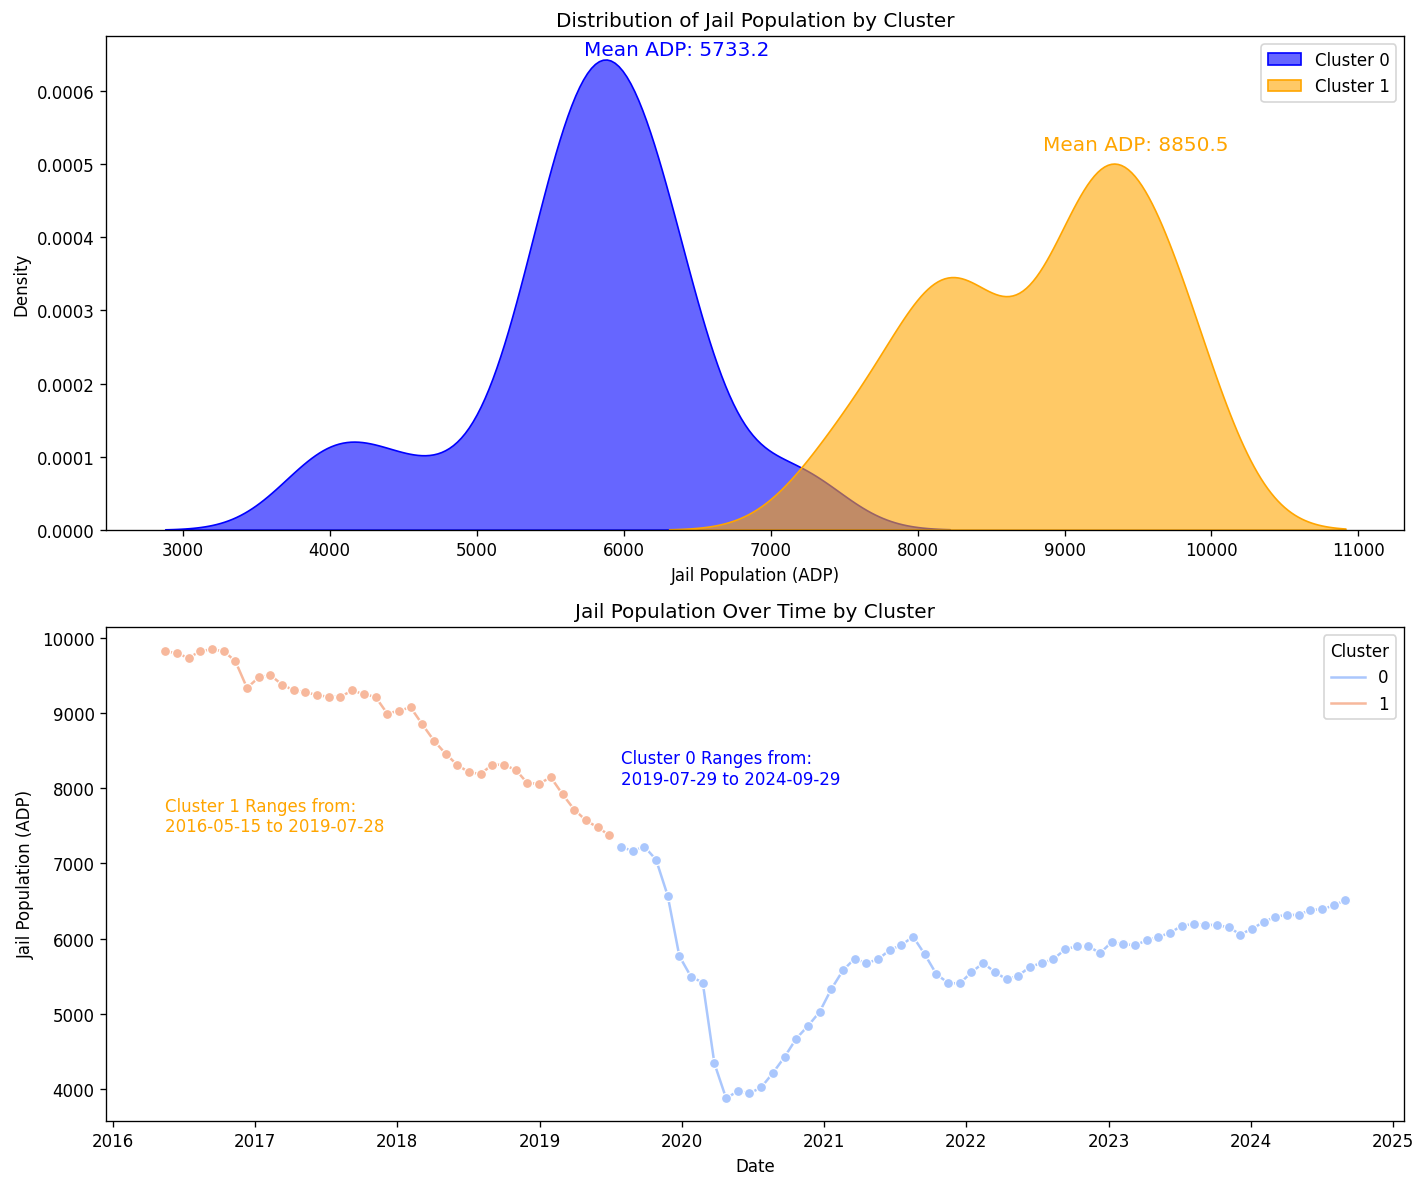

In [114]:
# Calculate cluster-wise statistics
cluster_means = monthly_pop.groupby('Cluster')['ADP'].mean()
cluster_min_dates = monthly_pop.groupby('Cluster')['Start Date'].min()
cluster_max_dates = monthly_pop.groupby('Cluster')['End Date'].max()

# Set up the 2x1 figure
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# KDE plot for the two clusters
sns.kdeplot(data=monthly_pop[monthly_pop['Cluster'] == 0]['ADP'], 
            fill=True, ax=axs[0], color='blue', label='Cluster 0', alpha=0.6)
sns.kdeplot(data=monthly_pop[monthly_pop['Cluster'] == 1]['ADP'], 
            fill=True, ax=axs[0], color='orange', label='Cluster 1', alpha=0.6)

# Add mean ADP text annotations for each cluster
axs[0].text(x=cluster_means[0], y=0.00065, s=f"Mean ADP: {cluster_means[0]:.1f}", color='blue', fontsize=12)
axs[0].text(x=cluster_means[1], y=0.00052, s=f"Mean ADP: {cluster_means[1]:.1f}", color='orange', fontsize=12)

# Add titles and labels for KDE plot
axs[0].set_title('Distribution of Jail Population by Cluster')
axs[0].set_xlabel('Jail Population (ADP)')
axs[0].set_ylabel('Density')
axs[0].legend()

# Line plot of cluster distribution over time
sns.lineplot(data=monthly_pop, x='Start Date', y='ADP', hue='Cluster', 
             ax=axs[1], palette='coolwarm', marker='o')

# Add text annotations for the min and max dates for each cluster
for cluster in [0, 1]:
    axs[1].text(x=cluster_min_dates[cluster], 
                y=monthly_pop[monthly_pop['Cluster'] == cluster]['ADP'].min() - 5 if cluster == 1 else 8000, 
                s=f"""Cluster {cluster} Ranges from:\n{cluster_min_dates[cluster].strftime('%Y-%m-%d')} to {cluster_max_dates[cluster].strftime('%Y-%m-%d')}""", 
                color='blue' if cluster == 0 else 'orange', 
                fontsize=10, verticalalignment='bottom')

# Add titles and labels for the line plot
axs[1].set_title('Jail Population Over Time by Cluster')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Jail Population (ADP)')
axs[1].legend(title='Cluster')

# Adjust layout
plt.tight_layout()
plt.savefig("../Outputs/adp_2cluster_kde_line_plot.png", bbox_inches = 'tight')
plt.show()


# Seasonal Decompose and Time Series Analysis

Now I am going to decompose the ADP signal to isolate the trend, seasonal component, and residuals.

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [116]:
monthly_pop.set_index('End Date', inplace=True)
y = np.log1p(monthly_pop['ADP'])

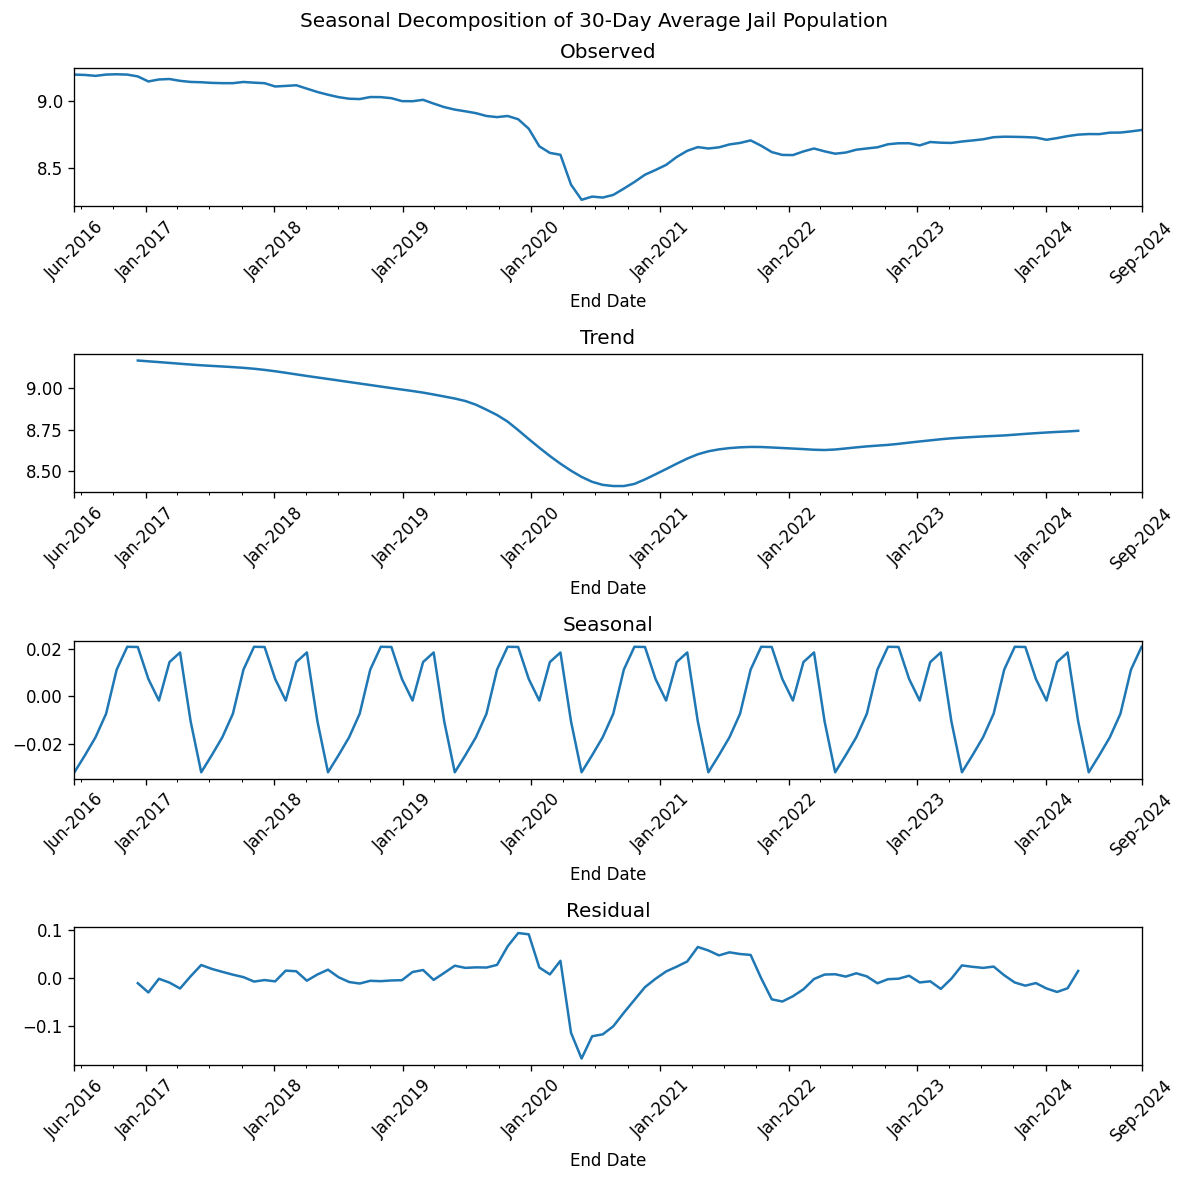

In [117]:
#first lets seasonal decompose
fig, axes = plt.subplots(4,1, figsize=(10, 10))

# Perform seasonal decomposition
result = seasonal_decompose(y, model='additive', period=12)  # Adjust 'period' according to your data
    
# Plot each component in a separate subplot
result.observed.plot(ax=axes[0], legend=False, title='Observed')
result.trend.plot(ax=axes[1], legend=False, title='Trend')
result.seasonal.plot(ax=axes[2], legend=False, title='Seasonal')
result.resid.plot(ax=axes[3], legend=False, title='Residual')

for j in range(4):
    axes[j].set_xlabel('End Date')
    axes[j].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
    axes[j].tick_params(axis='x', rotation=45)

# Adjust layout
plt.suptitle('Seasonal Decomposition of 30-Day Average Jail Population')
plt.tight_layout()
plt.savefig("../Outputs/adp_seasonal_decompose.png", bbox_inches = 'tight')
plt.show()

In [118]:
#test differencing coefficients 
#print adf test stats
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(y.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(y.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.742396
p-value: 0.409411
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583
ADF Statistic: -3.789485
p-value: 0.003017
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583
ADF Statistic: -13.302303
p-value: 0.000000
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583


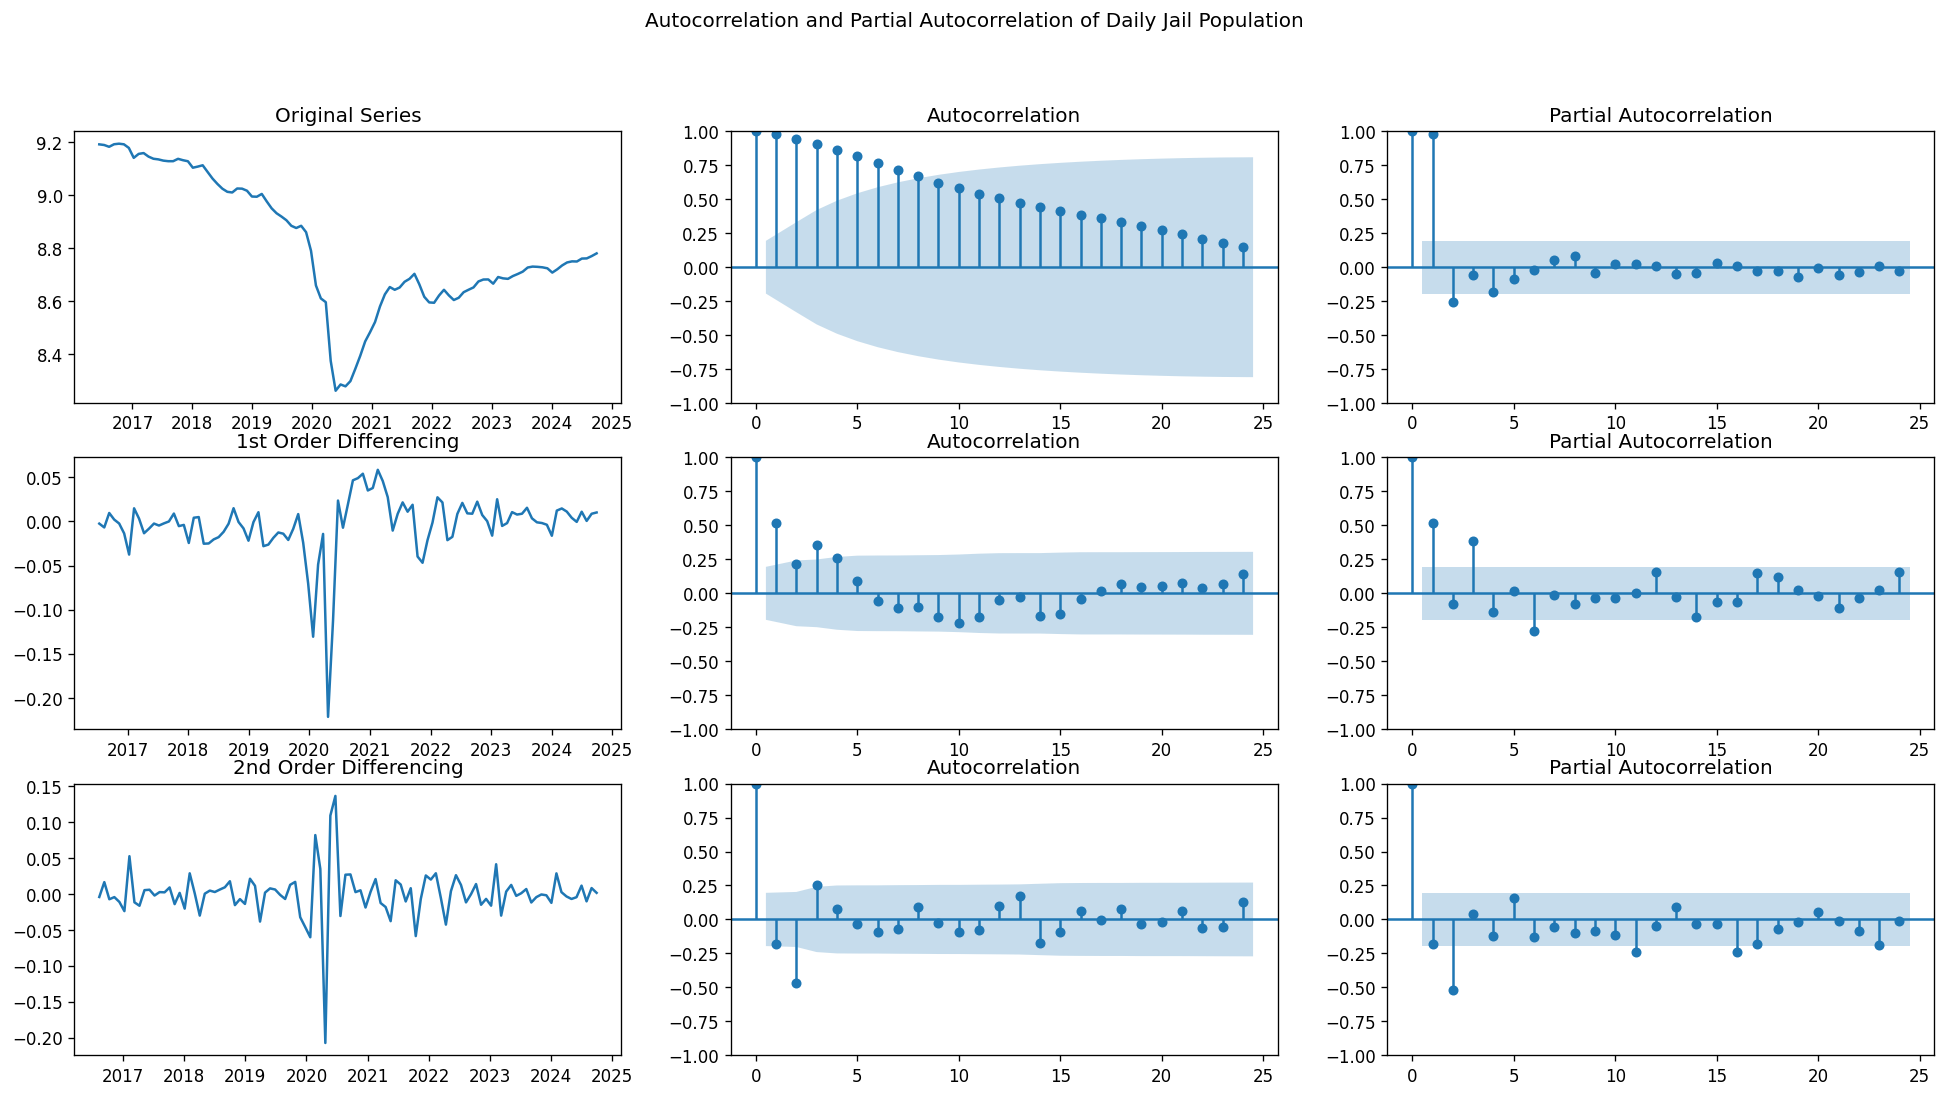

In [119]:
#based on the ADF test above, d = 1. Let's plot the acf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')

plot_acf(y, lags = 24, ax = axes[0, 1])
axes[0, 1].set_title('Autocorrelation')

plot_pacf(y, lags = 24, ax=axes[0, 2])
axes[0, 2].set_title('Partial Autocorrelation')


# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')

plot_acf(y.diff().dropna(), lags = 24, ax = axes[1, 1])
axes[1, 1].set_title('Autocorrelation')

plot_pacf(y.diff().dropna(), lags = 24, ax=axes[1, 2])
axes[1, 2].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[2, 0].plot(y.diff().diff().dropna()); axes[2, 0].set_title('2nd Order Differencing')

plot_acf(y.diff().diff().dropna(), lags = 24, ax = axes[2, 1])
axes[2, 1].set_title('Autocorrelation')

plot_pacf(y.diff().diff().dropna(), lags = 24, ax=axes[2, 2])
axes[2, 2].set_title('Partial Autocorrelation')

fig.suptitle("Autocorrelation and Partial Autocorrelation of Daily Jail Population")
# plt.savefig("../Outputs/daily_jail_pop_acf_pacf_plots.png",bbox_inches = 'tight')
plt.show()

### Rules for identifying the numbers of AR and MA terms:

* Rule 1: If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR(p) terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms.

* Rule 2: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA(q) term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.

* Rule 3: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL.


Based on the descriptive analysis above, if the timeseries is differenced by a degree of 1 we should add some autoregressive coefficients to our ARIMA model. If the timeseries is differenced by a degree of 2 we should add some moving average coefficients to our ARIMA model.

## Exogenous Variable Descriptive Analysis

In [120]:
#plot corr matrix
joined_doc_ivs_df = pd.read_csv("../Data/_30_day_IVs.csv", index_col = 0)
#specify data types for start and end date
joined_doc_ivs_df['Start Date'] = joined_doc_ivs_df['Start Date'].astype('datetime64[ns]')
joined_doc_ivs_df['End Date'] = joined_doc_ivs_df['End Date'].astype('datetime64[ns]')
joined_doc_ivs_df['LOS_30D'] = joined_doc_ivs_df['Avg LOS Days']/30
joined_doc_ivs_df.head()

,Start Date,End Date,admission_count,discharge_count,Avg LOS Days,LOS_30D
0,2016-05-15,2016-06-13,4935,4880,56.661485,1.888716
1,2016-06-14,2016-07-13,4897,4999,62.825000,2.094167
2,2016-07-14,2016-08-12,4871,4874,61.316523,2.043884
3,2016-08-13,2016-09-11,4600,4338,56.608826,1.886961
4,2016-09-12,2016-10-11,4519,4666,61.751337,2.058378


In [121]:
crime_data = pd.read_csv("../Data/_30_day_crime_counts.csv", index_col = 0)
#specify data types for start and end date
crime_data['Start Date'] = crime_data['Start Date'].astype('datetime64[ns]')
crime_data['End Date'] = crime_data['End Date'].astype('datetime64[ns]')

#get arrest data
arrest_data = pd.read_csv("../Data/_30_day_arrest_counts.csv", index_col = 0)
#specify data types for start and end date
arrest_data['Start Date'] = arrest_data['Start Date'].astype('datetime64[ns]')
arrest_data['End Date'] = arrest_data['End Date'].astype('datetime64[ns]')

In [122]:
print(len(crime_data),len(arrest_data),len(joined_doc_ivs_df),len(monthly_pop))

98 98 101 102


In [123]:
#join all variables of interest into one dataframe
crime_cols = ['Start Date', 'End Date', 'total_felony_crimes',
              'violent_felony_crimes','nonviolent_felony_crimes', 'total_misdemeanor_crimes']
arr_cols = ['Start Date', 'End Date', 'total_felony_arrest',
            'violent_felony_arrest','nonviolent_felony_arrest', 'total_misdemeanor_arrest']

#join adp and crime data
joined_df = monthly_pop.merge(crime_data[crime_cols],
                                 how = 'left',
                                 left_on= ['Start Date', 'End Date'],
                                 right_on= ['Start Date', 'End Date'])
#join arrests
joined_df = joined_df.merge(arrest_data[arr_cols],
                                 how = 'left',
                                 left_on= ['Start Date', 'End Date'],
                                 right_on= ['Start Date', 'End Date'])
#join admission count
joined_df = joined_df.merge(joined_doc_ivs_df,
                            how = 'left',
                            left_on= ['Start Date', 'End Date'],
                            right_on= ['Start Date', 'End Date']
                            )
joined_df.head()

,Start Date,End Date,ADP,Year,Cluster,total_felony_crimes,violent_felony_crimes,nonviolent_felony_crimes,total_misdemeanor_crimes,total_felony_arrest,violent_felony_arrest,nonviolent_felony_arrest,total_misdemeanor_arrest,admission_count,discharge_count,Avg LOS Days,LOS_30D
0,2016-05-15,2016-06-13,9820.0,2016,1,12504.0,3330.0,9174.0,23148.0,7890.0,2353.0,5537.0,17655.0,4935.0,4880.0,56.661485,1.888716
1,2016-06-14,2016-07-13,9796.0,2016,1,12792.0,3422.0,9370.0,22376.0,7647.0,2332.0,5315.0,16604.0,4897.0,4999.0,62.825000,2.094167
2,2016-07-14,2016-08-12,9730.0,2016,1,13079.0,3588.0,9491.0,22312.0,7849.0,2465.0,5384.0,15893.0,4871.0,4874.0,61.316523,2.043884
3,2016-08-13,2016-09-11,9824.0,2016,1,13320.0,3530.0,9790.0,22284.0,7812.0,2334.0,5478.0,16682.0,4600.0,4338.0,56.608826,1.886961
4,2016-09-12,2016-10-11,9845.0,2016,1,12309.0,3160.0,9149.0,21337.0,7582.0,2187.0,5395.0,16690.0,4519.0,4666.0,61.751337,2.058378


In [124]:
joined_df.tail()

,Start Date,End Date,ADP,Year,Cluster,total_felony_crimes,violent_felony_crimes,nonviolent_felony_crimes,total_misdemeanor_crimes,total_felony_arrest,violent_felony_arrest,nonviolent_felony_arrest,total_misdemeanor_arrest,admission_count,discharge_count,Avg LOS Days,LOS_30D
97,2024-05-03,2024-06-01,6313.0,2024,0,15032.0,4169.0,10863.0,24261.0,8977.0,3008.0,5969.0,12049.0,1979.0,1896.0,100.445205,3.348174
98,2024-06-02,2024-07-01,6383.0,2024,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,1962.0,101.879004,3.395967
99,2024-07-02,2024-07-31,6387.0,2024,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,1907.0,93.435992,3.114533
100,2024-08-01,2024-08-30,6443.0,2024,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,1975.0,96.664470,3.222149
101,2024-08-31,2024-09-29,6509.0,2024,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
#drop na
joined_df = joined_df.dropna()
joined_df = joined_df.drop(columns = 'Cluster')
joined_df.tail()

,Start Date,End Date,ADP,Year,total_felony_crimes,violent_felony_crimes,nonviolent_felony_crimes,total_misdemeanor_crimes,total_felony_arrest,violent_felony_arrest,nonviolent_felony_arrest,total_misdemeanor_arrest,admission_count,discharge_count,Avg LOS Days,LOS_30D
93,2024-01-04,2024-02-02,6129.0,2024,14510.0,3507.0,11003.0,23096.0,8702.0,2748.0,5954.0,12029.0,1938.0,1818.0,98.985140,3.299505
94,2024-02-03,2024-03-03,6220.0,2024,14056.0,3491.0,10565.0,23436.0,8820.0,2690.0,6130.0,11640.0,1902.0,1732.0,97.537709,3.251257
95,2024-03-04,2024-04-02,6290.0,2024,14166.0,3599.0,10567.0,22936.0,8806.0,2898.0,5908.0,11503.0,1992.0,2011.0,99.914385,3.330480
96,2024-04-03,2024-05-02,6316.0,2024,14550.0,3812.0,10738.0,23505.0,8919.0,2901.0,6018.0,11930.0,1961.0,1947.0,102.004620,3.400154
97,2024-05-03,2024-06-01,6313.0,2024,15032.0,4169.0,10863.0,24261.0,8977.0,3008.0,5969.0,12049.0,1979.0,1896.0,100.445205,3.348174


Before conducting any correlational computations, I am going to standardize the data using long-transform.

In [126]:
# Apply log1p transformation to ADP and exogenous variables
joined_df_log = joined_df.copy()  # Create a copy to preserve the original DataFrame
columns_to_transform = joined_df.columns[2:]  # Exclude the first two columns (dates)

# Transforming with log1p
joined_df_log[columns_to_transform] = np.log1p(joined_df[columns_to_transform])

### Correlation 
We can created a heatmap showing correlations between our variables to highlight how strongly ADP correlates with each exogenous variable, helping identify relationships.

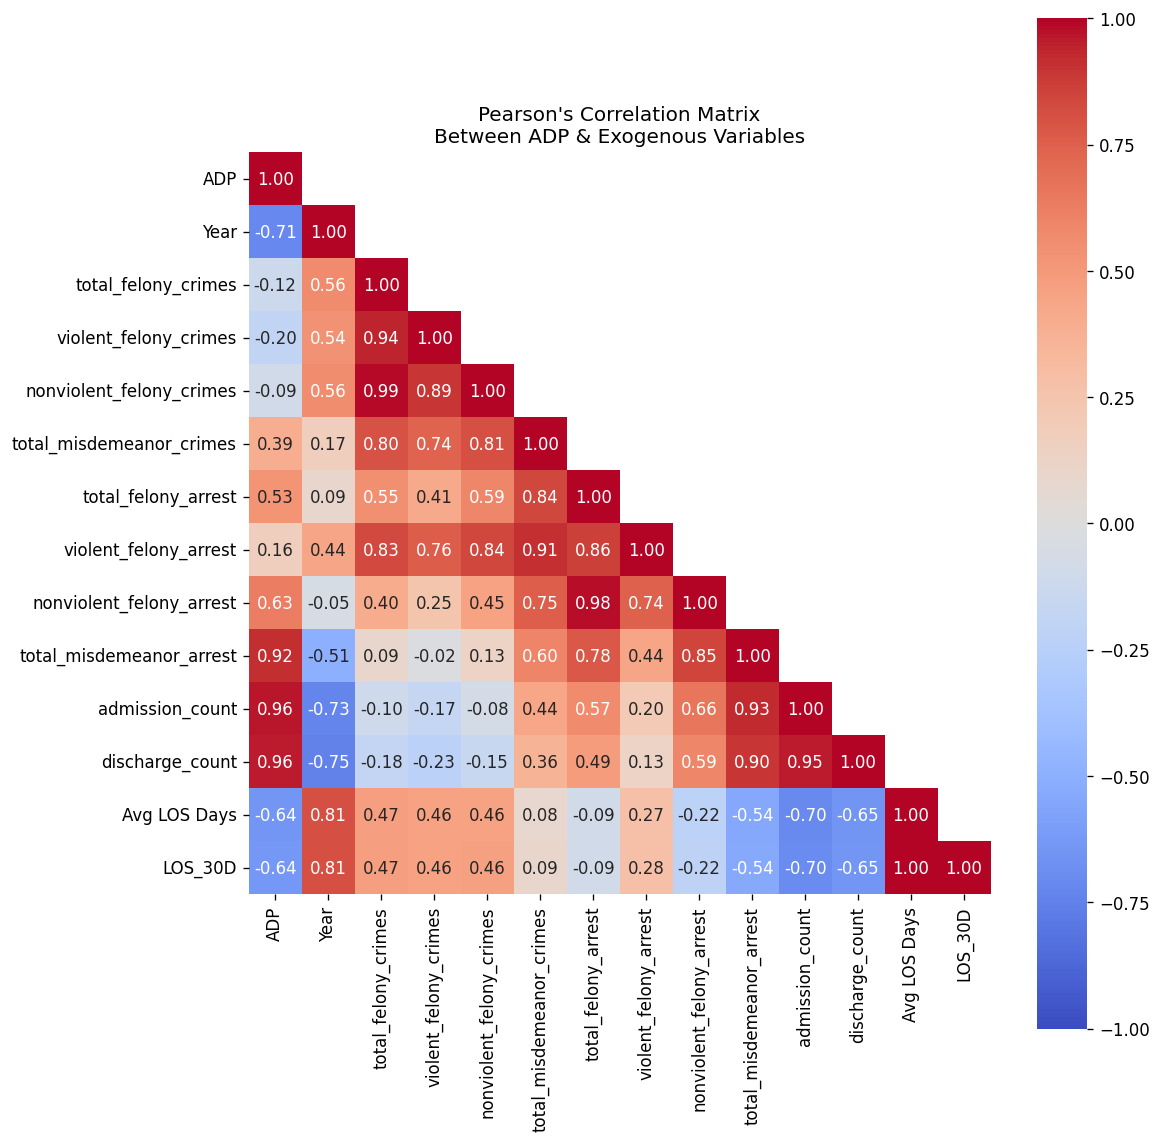

In [136]:
# Set up the diverging color palette with white at the center (0) and red at both extremes (-1 and 1)
# Compute the correlation matrix
corr_matrix = joined_df_log[joined_df_log.columns.to_list()[2:]].corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plotting correlation matrix using seaborn with masked upper triangle
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap = 'coolwarm',
            vmin=-1, 
            vmax=1, 
            center=0,
            fmt="0.2f",
            square=True,
            mask=mask
            )
plt.title("Pearson's Correlation Matrix\nBetween ADP & Exogenous Variables")
# Adjust layout
plt.tight_layout()
# Display the heatmap
plt.savefig("../Outputs/corr_heatmap_plot.png", bbox_inches = 'tight')
plt.show()

In [128]:
corr_adp = joined_df_log.corr()['ADP'].sort_values(ascending=False)
print(corr_adp)

ADP                         1.000000
admission_count             0.961994
discharge_count             0.958053
total_misdemeanor_arrest    0.920662
nonviolent_felony_arrest    0.627559
total_felony_arrest         0.529305
total_misdemeanor_crimes    0.394762
violent_felony_arrest       0.164898
nonviolent_felony_crimes   -0.091674
total_felony_crimes        -0.124312
violent_felony_crimes      -0.195160
LOS_30D                    -0.637887
Avg LOS Days               -0.643428
Year                       -0.712955
Start Date                 -0.721632
End Date                   -0.721632
Name: ADP, dtype: float64


### Partial Correlation

A partial correlation coefficient measures the strength and direction of the linear relationship between two variables while controlling for the effect of one or more other variables. In your case, it measures how each exogenous variable relates to ADP after removing the effects of the other variables in the model. We can use the pingouin library to compute this.

In [129]:
from pingouin import partial_corr

In [130]:
partial_corrs = []

# Select only the columns for exogenous variables, excluding the first two columns
exogenous_columns = joined_df_log.columns[2:]  # This excludes the first two columns

for col in exogenous_columns:  
    if col == 'ADP':
        continue
    # Create a list of covariates excluding the current column and 'ADP'
    covariates = [x for x in exogenous_columns if x != col and x != 'ADP']
    p_corr = partial_corr(data=joined_df_log, x=col, y='ADP', covar=covariates)
    partial_corrs.append((col, p_corr['r'].values[0]))

partial_corrs


[('Year', 0.2110981862639864),
 ('total_felony_crimes', 0.034934786386683875),
 ('violent_felony_crimes', -0.02714412001045183),
 ('nonviolent_felony_crimes', -0.03297958499378413),
 ('total_misdemeanor_crimes', -0.21214618583305975),
 ('total_felony_arrest', -0.13449942344984092),
 ('violent_felony_arrest', 0.08825572758974455),
 ('nonviolent_felony_arrest', 0.11537648056754328),
 ('total_misdemeanor_arrest', 0.4933438700002521),
 ('admission_count', 0.46388636822703827),
 ('discharge_count', 0.23310495992942806),
 ('Avg LOS Days', 0.07007651935463993),
 ('LOS_30D', -0.06092097664031467)]

### Feature Importance using Random Forest Regressor

You can fit a model like Random Forest or XGBoost to predict ADP using the exogenous variables and visualize feature importance. It is important to note that these ML models are non-linear. We will use a linear ARIMA model so the relationships found using these solutions might not exactly hold up with our model.

In [131]:
from sklearn.ensemble import RandomForestRegressor

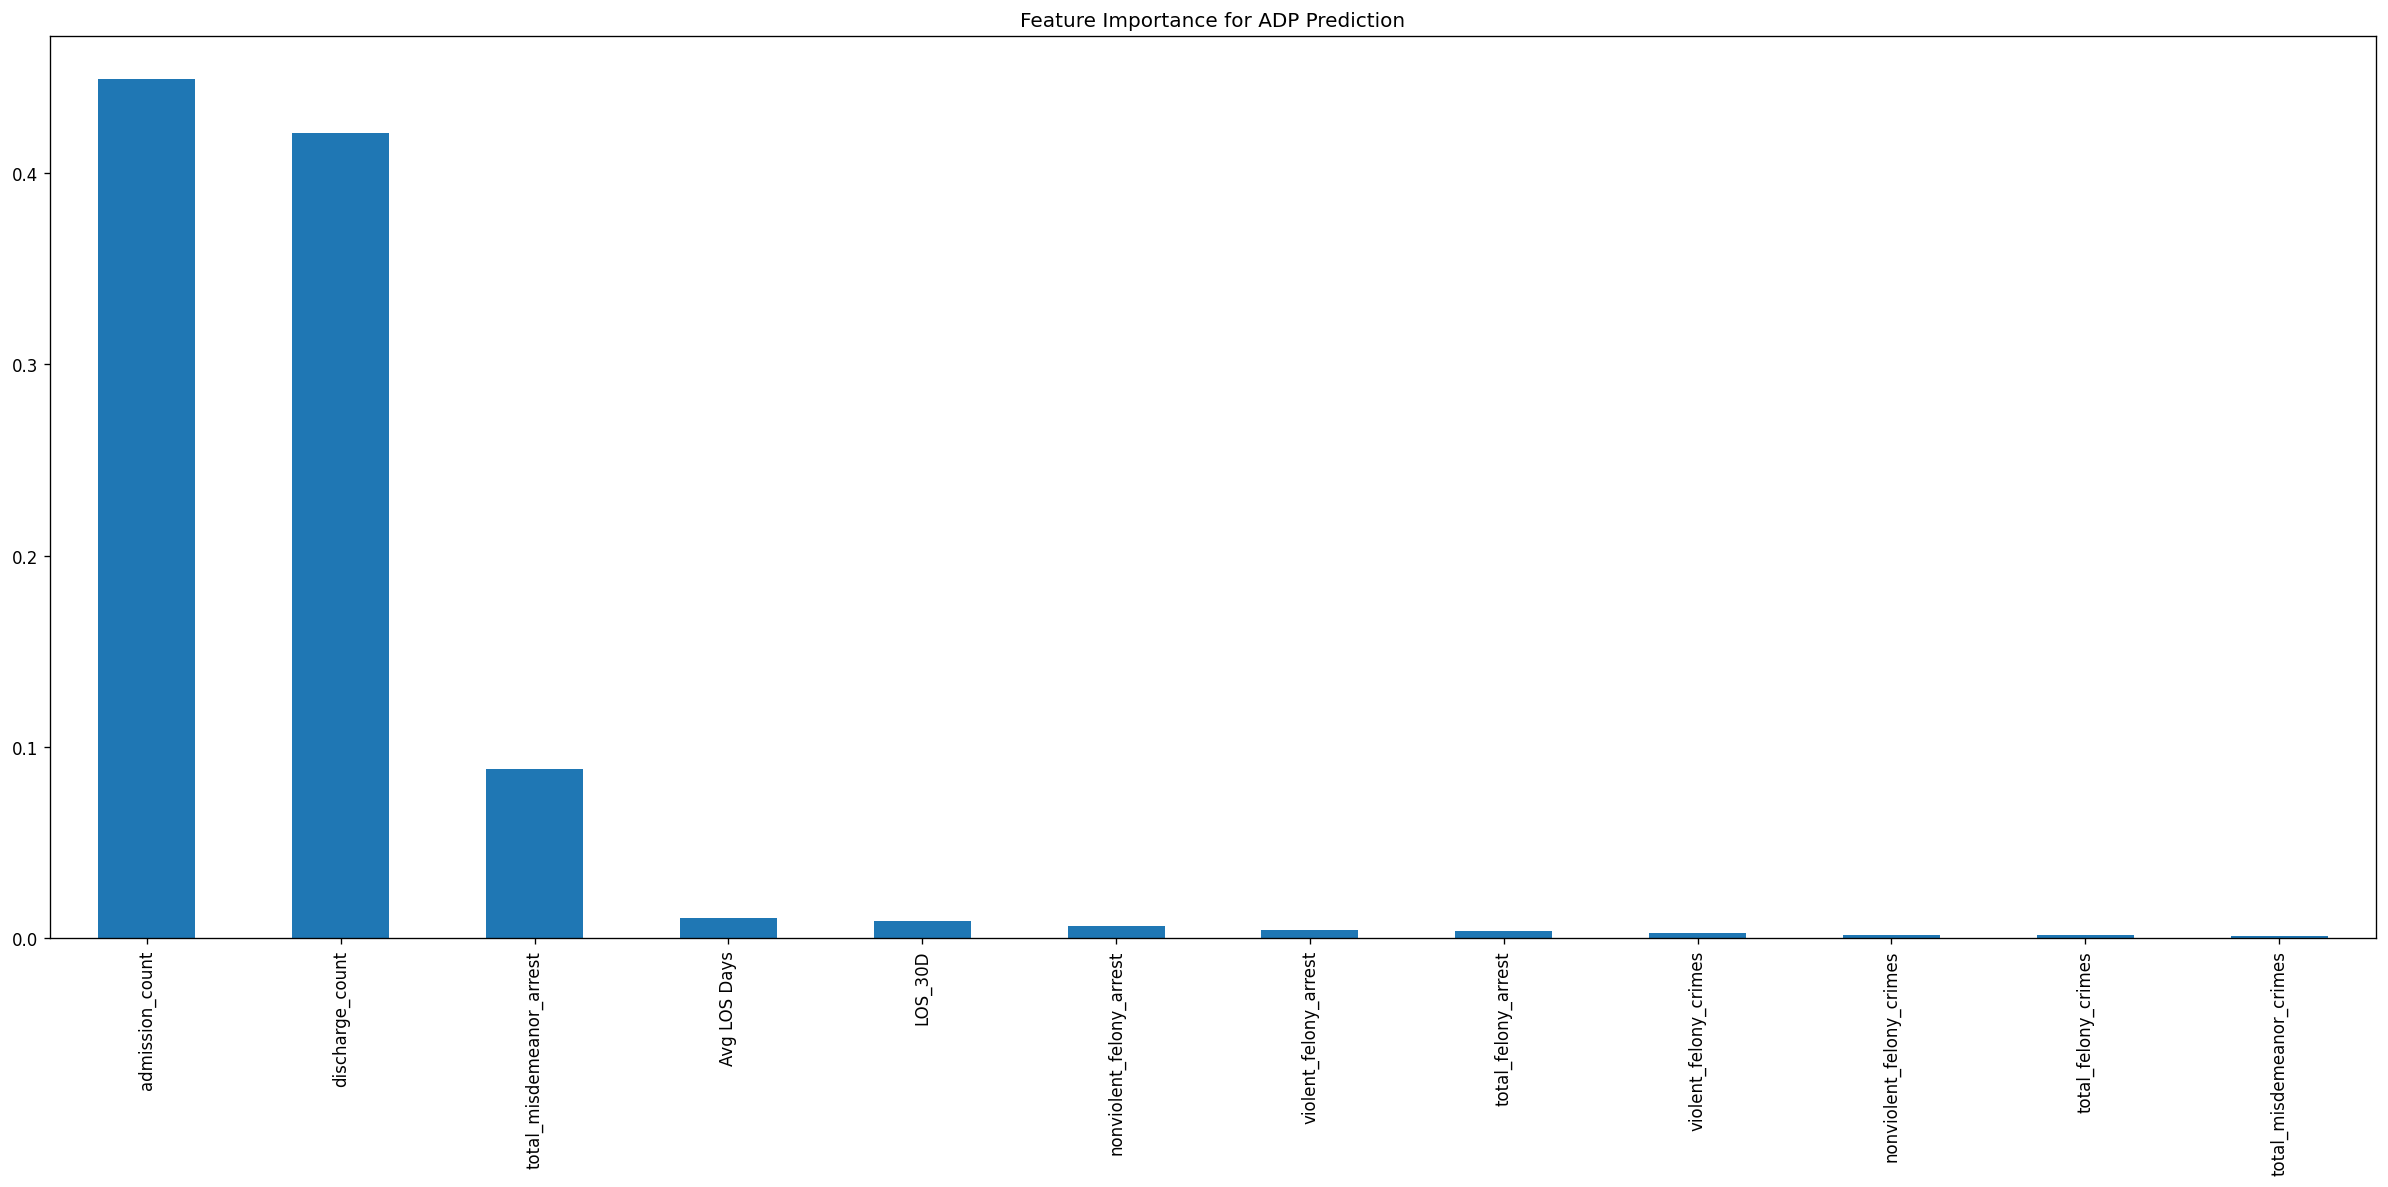

In [132]:
importances = RandomForestRegressor().fit(joined_df_log.iloc[:, 4:], joined_df_log['ADP']).feature_importances_

feature_importance = pd.Series(importances, index=joined_df_log.columns[4:]).sort_values(ascending=False)
feature_importance.plot(kind='bar')
plt.title('Feature Importance for ADP Prediction')
plt.tight_layout()
plt.show()

### Permutation Feature Importance (for Time Series Models)

This method works by measuring how much the error increases when a feature is randomly shuffled. You can use this for a trained time series model (e.g., SARIMAX).

In [133]:
from sklearn.inspection import permutation_importance

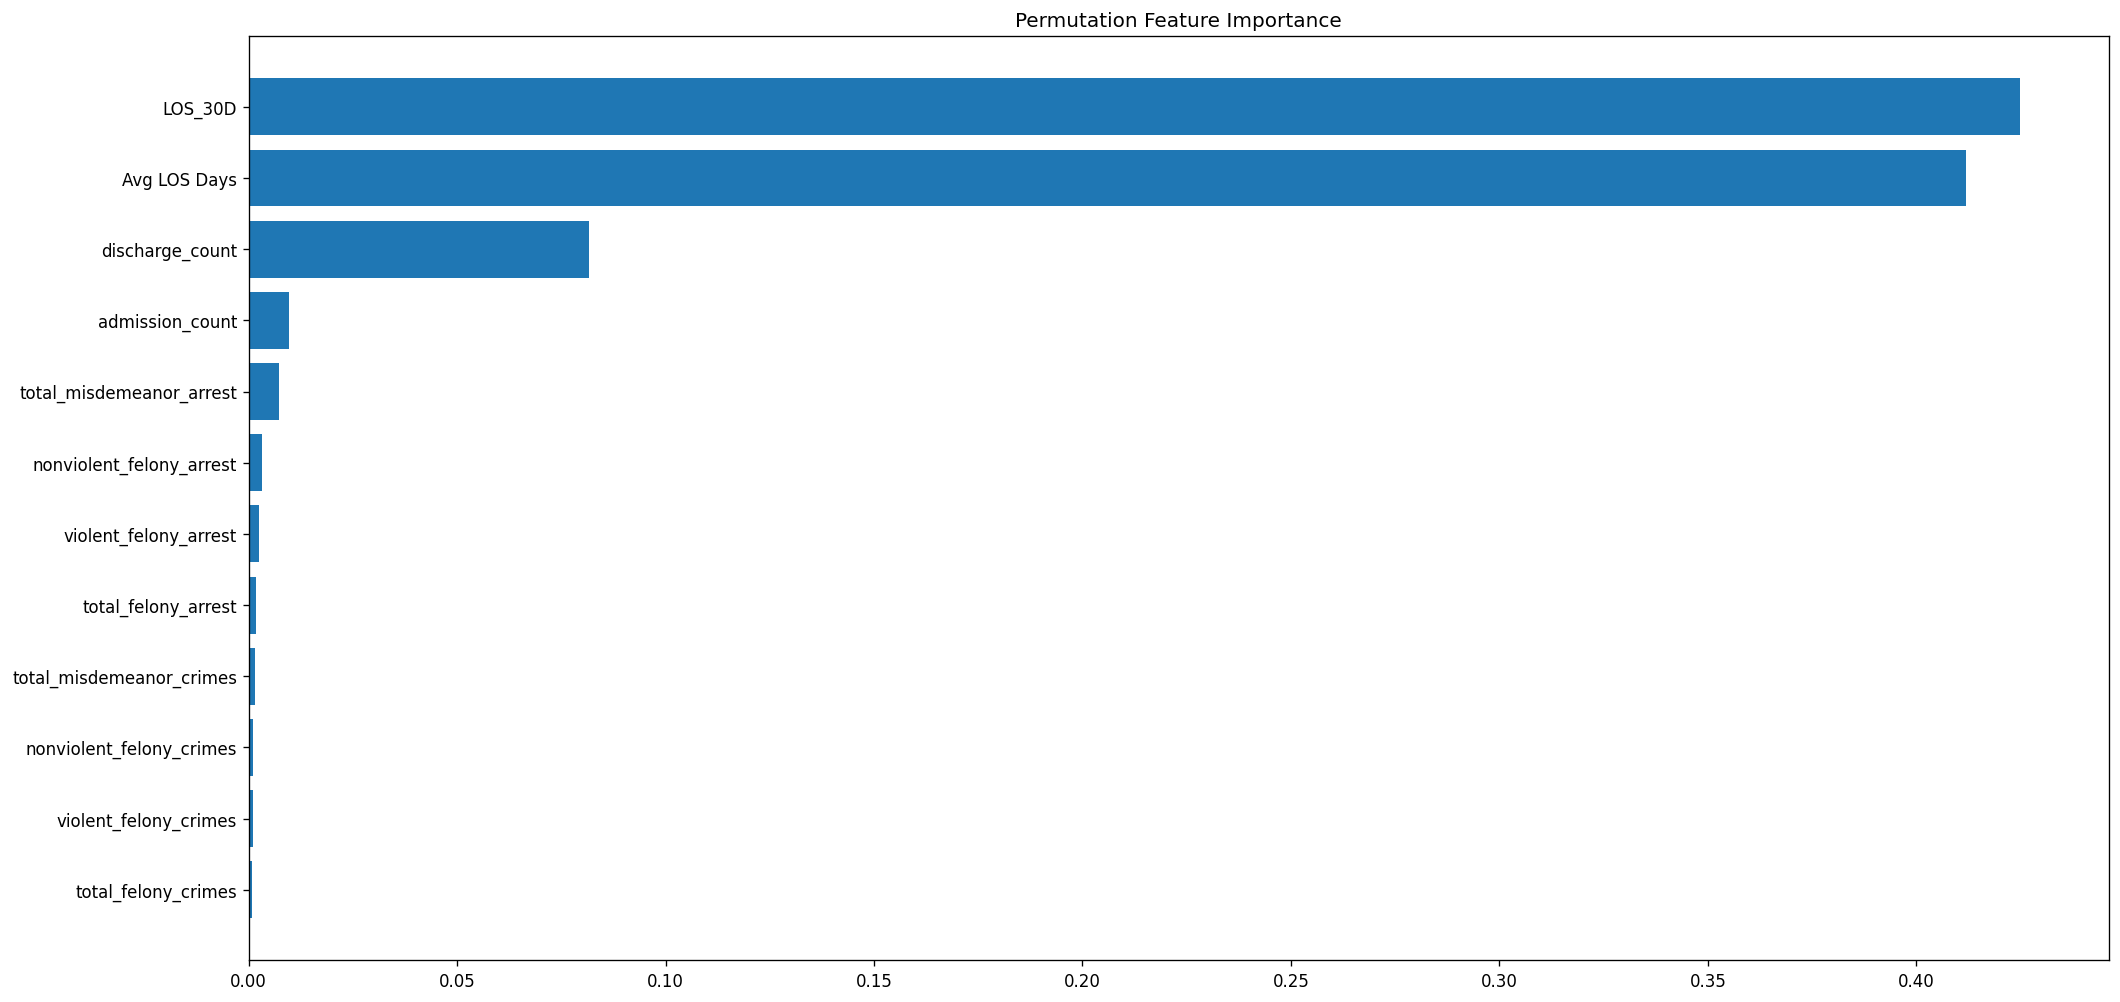

In [134]:
model = RandomForestRegressor().fit(joined_df_log.iloc[:, 4:], joined_df_log['ADP'])
perm_importance = permutation_importance(model, joined_df_log.iloc[:, 4:], joined_df_log['ADP'])
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(joined_df_log.columns[4:], perm_importance.importances_mean[sorted_idx])
plt.title('Permutation Feature Importance')
plt.show()
